## Install and Import Dependencies

In [1]:
!pip install kaggle --quiet
import os
import cv2 as cv
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow import keras
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [5]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

## Import Dataset from Kaggle

In [6]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

 94% 153M/163M [00:01<00:00, 87.0MB/s]
100% 163M/163M [00:01<00:00, 104MB/s] 


In [7]:
# Extract the Compressed(ZIP) Dataset
from zipfile import ZipFile

dataset = './face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
    zip.extractall()
    print('The dataset is extracted')


The dataset is extracted


In [8]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


In [9]:
with_mask_files = os.listdir('./data/with_mask')

In [10]:
without_mask_files = os.listdir('./data/without_mask')

In [11]:
print(with_mask_files[0:5])

['with_mask_466.jpg', 'with_mask_162.jpg', 'with_mask_3039.jpg', 'with_mask_2550.jpg', 'with_mask_1.jpg']


In [12]:
print(without_mask_files[0:5])

['without_mask_2932.jpg', 'without_mask_2632.jpg', 'without_mask_1816.jpg', 'without_mask_3203.jpg', 'without_mask_50.jpg']


## **Display the Sample Images**

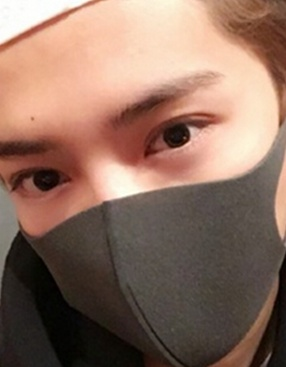

In [13]:
# Display the image with mask
sample_with_mask = cv.imread('./data/with_mask/with_mask_272.jpg')
cv2_imshow(sample_with_mask)

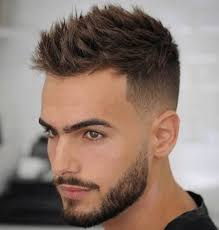

In [14]:
# Display the image without mask
sample_without_mask = cv.imread('./data/without_mask/without_mask_1060.jpg')
cv2_imshow(sample_without_mask)

In [15]:
with_mask_num = len(with_mask_files)
without_mask_num = len(without_mask_files)

print('Number of with mask images:', with_mask_num)
print('Number of without mask images:', without_mask_num)

Number of with mask images: 3725
Number of without mask images: 3828


### Create Labels for the Two Classes - With Mask & Without Mask

* with mask --> 1
* without mask --> 0

In [16]:
# create the labels

with_mask_labels = [1]*with_mask_num

without_mask_labels = [0]*without_mask_num

In [17]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [18]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [19]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


## Image Processing

In [20]:
with_mask_path = './data/with_mask/'

data = []

for img_file in with_mask_files:

    image = Image.open(with_mask_path + img_file)
    image = image.resize((128,128))      # Resize the images
    image = image.convert('RGB')
    image = np.array(image)              # Convert images to numpy arrays
    data.append(image)



without_mask_path = './data/without_mask/'


for img_file in without_mask_files:

    image = Image.open(without_mask_path + img_file)
    image = image.resize((128,128))      # Resize the images
    image = image.convert('RGB')
    image = np.array(image)              # Convert images to numpy arrays
    data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [21]:
type(data)

list

In [22]:
len(data)

7553

In [23]:
type(data[0])

numpy.ndarray

In [24]:
data[0]

array([[[ 53,  48,  44],
        [ 61,  56,  52],
        [ 78,  73,  69],
        ...,
        [ 24,  23,  28],
        [ 25,  24,  29],
        [ 25,  24,  29]],

       [[ 71,  66,  62],
        [ 79,  74,  71],
        [ 94,  89,  85],
        ...,
        [ 22,  21,  26],
        [ 22,  21,  26],
        [ 22,  21,  26]],

       [[ 83,  78,  76],
        [ 91,  85,  83],
        [102,  97,  93],
        ...,
        [ 20,  19,  24],
        [ 19,  18,  23],
        [ 19,  18,  23]],

       ...,

       [[ 17,  17,  25],
        [ 18,  17,  25],
        [ 19,  18,  26],
        ...,
        [ 17,  12,  19],
        [ 16,  11,  18],
        [ 16,  11,  18]],

       [[ 19,  17,  25],
        [ 20,  18,  27],
        [ 21,  19,  28],
        ...,
        [ 18,  13,  20],
        [ 19,  14,  21],
        [ 20,  15,  22]],

       [[ 20,  17,  26],
        [ 21,  18,  27],
        [ 22,  19,  28],
        ...,
        [ 18,  13,  20],
        [ 20,  15,  22],
        [ 21,  16,  23]]

In [25]:
data[0].shape

(128, 128, 3)

In [26]:
# Convert image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [27]:
print(type(X), type(Y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [28]:
print("X.shape: ", X.shape)
print("Y.shape: ", Y.shape)

X.shape:  (7553, 128, 128, 3)
Y.shape:  (7553,)


In [29]:
print(Y)

[1 1 1 ... 0 0 0]


## Split the Dataset

Train-Test-Split

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [31]:
print('X.shape: ', X.shape)
print('X_train.shape: ', X_train.shape)
print('X_test.shape: ', X_test.shape)

X.shape:  (7553, 128, 128, 3)
X_train.shape:  (6042, 128, 128, 3)
X_test.shape:  (1511, 128, 128, 3)


In [32]:
# Scale the Data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [33]:
X_train[100]

array([[[ 39,  40,  44],
        [ 39,  40,  44],
        [ 39,  40,  44],
        ...,
        [ 38,  39,  41],
        [ 38,  39,  41],
        [ 38,  39,  41]],

       [[ 39,  40,  44],
        [ 38,  39,  43],
        [ 39,  40,  44],
        ...,
        [ 38,  39,  41],
        [ 38,  39,  41],
        [ 38,  39,  41]],

       [[ 40,  41,  45],
        [ 39,  40,  44],
        [ 39,  40,  44],
        ...,
        [ 37,  38,  40],
        [ 38,  39,  41],
        [ 39,  40,  42]],

       ...,

       [[143, 125, 106],
        [137, 119, 102],
        [130, 113,  97],
        ...,
        [119, 113, 106],
        [130, 111, 106],
        [124, 100,  95]],

       [[147, 126, 107],
        [140, 121, 102],
        [133, 114,  97],
        ...,
        [122, 117, 108],
        [133, 125, 118],
        [124, 113, 106]],

       [[142, 122, 103],
        [136, 117, 100],
        [135, 116,  99],
        ...,
        [134, 132, 120],
        [135, 131, 121],
        [142, 136, 126]]

In [34]:
X_train_scaled[100]

array([[[0.15294118, 0.15686275, 0.17254902],
        [0.15294118, 0.15686275, 0.17254902],
        [0.15294118, 0.15686275, 0.17254902],
        ...,
        [0.14901961, 0.15294118, 0.16078431],
        [0.14901961, 0.15294118, 0.16078431],
        [0.14901961, 0.15294118, 0.16078431]],

       [[0.15294118, 0.15686275, 0.17254902],
        [0.14901961, 0.15294118, 0.16862745],
        [0.15294118, 0.15686275, 0.17254902],
        ...,
        [0.14901961, 0.15294118, 0.16078431],
        [0.14901961, 0.15294118, 0.16078431],
        [0.14901961, 0.15294118, 0.16078431]],

       [[0.15686275, 0.16078431, 0.17647059],
        [0.15294118, 0.15686275, 0.17254902],
        [0.15294118, 0.15686275, 0.17254902],
        ...,
        [0.14509804, 0.14901961, 0.15686275],
        [0.14901961, 0.15294118, 0.16078431],
        [0.15294118, 0.15686275, 0.16470588]],

       ...,

       [[0.56078431, 0.49019608, 0.41568627],
        [0.5372549 , 0.46666667, 0.4       ],
        [0.50980392, 0

## Build a Convolutional Neural Network (CNN)

In [36]:
from keras.applications.mobilenet_v2 import MobileNetV2

In [43]:
# Load MobileNetV2 pretrained model
input_shape = (128,128,3)
base_model = MobileNetV2(input_shape=input_shape, include_top=False, weights='imagenet')

In [44]:
# Freeze the layers of the pretrained model
for layer in base_model.layers:
    layer.trainable = False

In [46]:
from keras import layers, models

In [52]:
# Define the model

model = keras.Sequential()

model.add(base_model)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(1, activation='sigmoid'))

In [39]:
# Define the model

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3))) # input size: 3 x 128 x 128
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))     # output size: 32 x 63 x 63

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))     # output size: 64 x 30 x 30

model.add(keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))     # output size: 128 x 14 x 14

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dropout(0.4))

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.4))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.4))

model.add(keras.layers.Dense(num_classes, activation='sigmoid'))

In [53]:
# Compile the neural network

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])

In [54]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_128 (Func  (None, 4, 4, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d_2  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_5 (Dense)             (None, 1)                 1281      
                                                                 
Total params: 2259265 (8.62 MB)
Trainable params: 1281 (5.00 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [55]:
# Train the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 71s 399ms/step - loss: 0.1266 - acc: 0.9601 - val_loss: 0.0616 - val_acc: 0.9835
Epoch 2/5
170/170 [==============================] - 68s 400ms/step - loss: 0.0563 - acc: 0.9812 - val_loss: 0.0505 - val_acc: 0.9884
Epoch 3/5
170/170 [==============================] - 62s 363ms/step - loss: 0.0430 - acc: 0.9860 - val_loss: 0.0483 - val_acc: 0.9851
Epoch 4/5
170/170 [==============================] - 67s 394ms/step - loss: 0.0356 - acc: 0.9893 - val_loss: 0.0461 - val_acc: 0.9868
Epoch 5/5
170/170 [==============================] - 67s 395ms/step - loss: 0.0299 - acc: 0.9919 - val_loss: 0.0460 - val_acc: 0.9884


## Evaluate the Model

In [56]:
train_loss, train_accuracy = model.evaluate(X_train_scaled, Y_train)
print('Train Accuracy =', train_accuracy)

189/189 [==============================] - 62s 329ms/step - loss: 0.0289 - acc: 0.9921
Train Accuracy = 0.9920555949211121


In [57]:
test_loss, test_accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', test_accuracy)

48/48 [==============================] - 17s 350ms/step - loss: 0.0521 - acc: 0.9828
Test Accuracy = 0.982792854309082


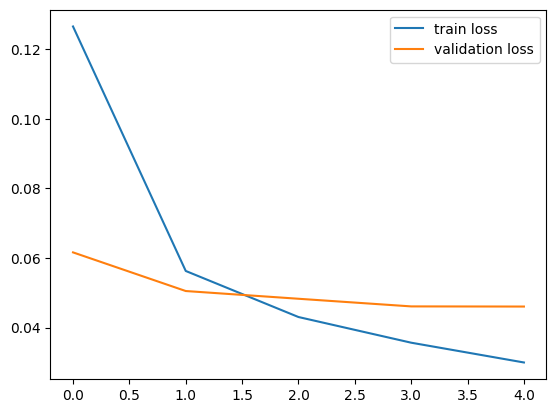

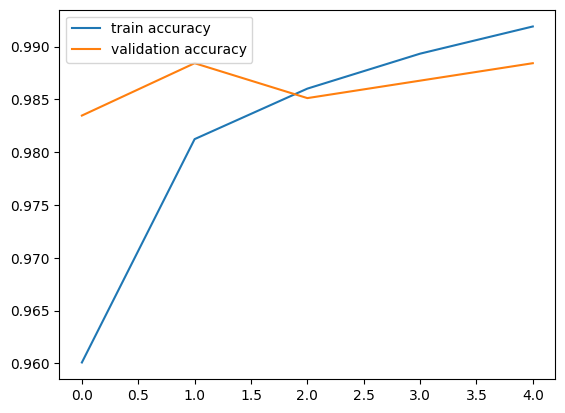

In [58]:
hist = history

# Plot the loss value
plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# Plot the accuracy value
plt.plot(hist.history['acc'], label='train accuracy')
plt.plot(hist.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

## Predict on Images

In [65]:
def predict_images(img_path, model):
    input_image = cv.imread(img_path)

    cv2_imshow(input_image)

    input_image_resized = cv.resize(input_image, (128,128))

    input_image_scaled = input_image_resized/255

    input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

    input_prediction = model.predict(input_image_reshaped)

    print(input_prediction)

    threshold = 0.5

    input_pred_label = (input_prediction > threshold).astype(int)

    print(input_pred_label)

    if input_pred_label == 1:

      print('The person in the image is wearing a mask')

    else:

      print('The person in the image is not wearing a mask')

Test for With Mask Images

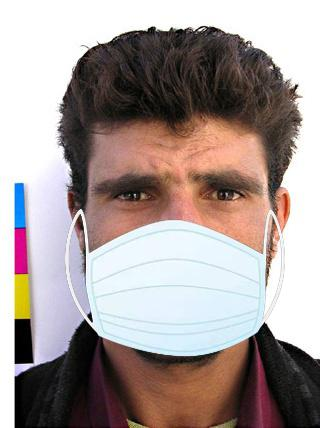

1/1 [==============================] - 0s 38ms/step
[[0.99994636]]
[[1]]
The person in the image is wearing a mask


In [71]:
img_path = './data/with_mask/with_mask_1662.jpg'
predict_images(img_path, model)

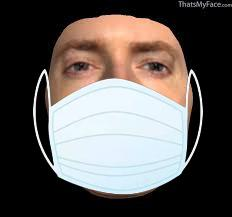

1/1 [==============================] - 0s 52ms/step
[[0.99949306]]
[[1]]
The person in the image is wearing a mask


In [67]:
img_path = './data/with_mask/with_mask_1744.jpg'
predict_images(img_path, model)

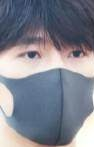

1/1 [==============================] - 0s 36ms/step
[[0.9995787]]
[[1]]
The person in the image is wearing a mask


In [68]:
img_path = './data/with_mask/with_mask_1142.jpg'
predict_images(img_path, model)

Test for Without Mask images

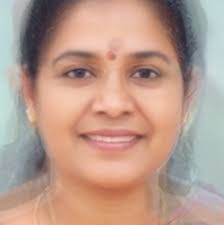

1/1 [==============================] - 0s 86ms/step
[[0.00079934]]
[[0]]
The person in the image is not wearing a mask


In [70]:
img_path = './data/without_mask/without_mask_1671.jpg'
predict_images(img_path, model)

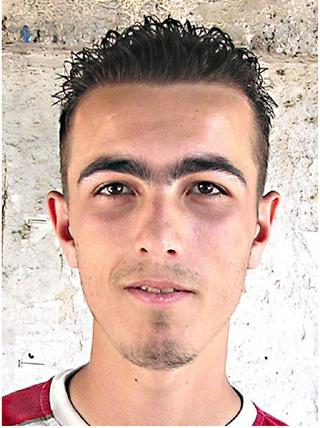

1/1 [==============================] - 0s 38ms/step
[[0.00040505]]
[[0]]
The person in the image is not wearing a mask


In [72]:
img_path = './data/without_mask/without_mask_1274.jpg'
predict_images(img_path, model)

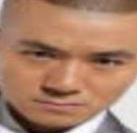

1/1 [==============================] - 0s 38ms/step
[[0.15505147]]
[[0]]
The person in the image is not wearing a mask


In [73]:
img_path = './data/without_mask/without_mask_106.jpg'
predict_images(img_path, model)

In [74]:
def predict_probs(img_path, model):
    input_image = cv.imread(img_path)

    input_image_resized = cv.resize(input_image, (128,128))

    input_image_scaled = input_image_resized/255

    input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

    input_prediction = model.predict(input_image_reshaped)

    return input_prediction

In [78]:
predict_probs(img_path, model)[0][0]

1/1 [==============================] - 0s 58ms/step


0.15505147

In [81]:
dir_with_mask = './data/with_mask'
dir_without_mask = './data/without_mask'

In [80]:
probs_with_mask = []
probs_without_mask = []

In [82]:
for img in os.listdir(dir_with_mask):
    path = dir_with_mask + '/' + img
    prob = predict_probs(path, model)
    probs_with_mask.append(prob)


for img in os.listdir(dir_without_mask):
    path = dir_without_mask + '/' + img
    prob = predict_probs(path, model)
    probs_without_mask.append(prob)

1/1 [==============================] - 0s 52ms/step


In [89]:
probs_with_mask = np.array(probs_with_mask).reshape((with_mask_num,))
probs_without_mask = np.array(probs_without_mask).reshape((without_mask_num,))

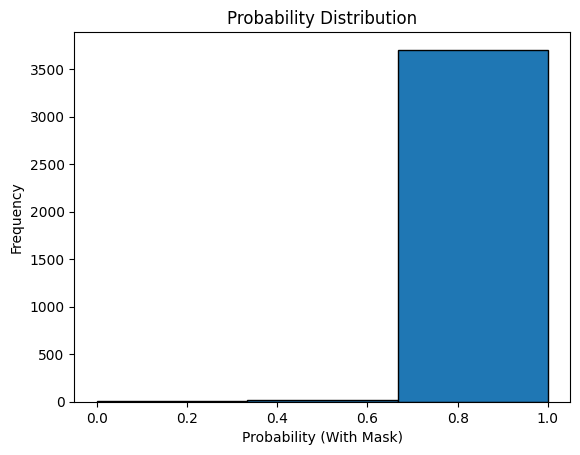

In [92]:
probabilities = probs_with_mask

# Create a histogram
plt.hist(probabilities, bins=3, range=(0, 1), edgecolor='black')

# Customize the plot
plt.title('Probability Distribution')
plt.xlabel('Probability (With Mask)')
plt.ylabel('Frequency')

# Show the plot
plt.show()

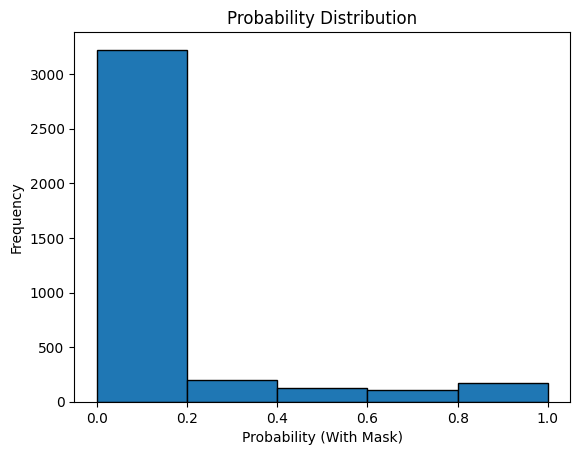

In [94]:
probabilities = probs_without_mask

# Create a histogram
plt.hist(probabilities, bins=5, range=(0, 1), edgecolor='black')

# Customize the plot
plt.title('Probability Distribution')
plt.xlabel('Probability (With Mask)')
plt.ylabel('Frequency')

# Show the plot
plt.show()